Importing numpy (scientific computing)
and matplotlib (plotting)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) is used for setting the same initial conditions

In [2]:
np.random.seed(0)

In [3]:
dogs_whiskers_lengths = np.random.normal(loc=5, scale=1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

In [4]:
dogs_whiskers_lengths

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

In [5]:
dogs_ear_flappiness_index

array([8.14404357, 9.45427351, 8.76103773, 8.12167502, 8.44386323,
       8.33367433, 9.49407907, 7.79484174, 8.3130677 , 7.14590426])

np.random.normal means its a normal distribution or gaussian  distribution
loc=5 means mean = 5
scale=1 means SD = 1
size=10 means no'of data points = 10
since dogs have higher flappiness index and lower whiskers length we made mean = 5 for whiskers length and mean = 8 for ear flappiness index

In [7]:
cats_whiskers_lengths = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

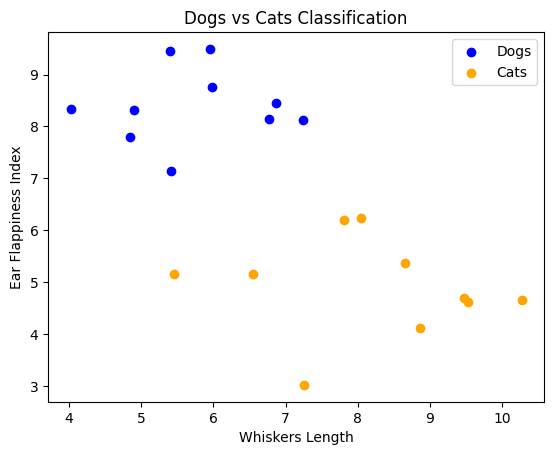

In [8]:
# Plot the data points
plt.scatter(dogs_whiskers_lengths, dogs_ear_flappiness_index, color='blue', label='Dogs')
plt.scatter(cats_whiskers_lengths, cats_ear_flappiness_index, color='orange', label='Cats')
plt.xlabel('Whiskers Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification')
plt.legend()
plt.show()

In [10]:
# Implementing random linear classifier algorithm
def random_linear_classifier(data_dogs, data_cats, k, d): 
    # d is the no'of features we have 2 (whiskers length and ear flappiness index)
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(data_dogs, data_cats, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0

In [9]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0:
            error += 1
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0:
            error += 1
    return error

In [11]:
# prepare data for algorithm
data_dogs = np.vstack((dogs_whiskers_lengths, dogs_ear_flappiness_index)).T
data_cats = np.vstack((cats_whiskers_lengths, cats_ear_flappiness_index)).T

In [12]:
data_dogs

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [13]:
# Run random linear classifier algorithm
k = 100 # number of iterations
d = 2   # number of features
best_theta, best_theta0 = random_linear_classifier(data_dogs, data_cats, k, d)

In [14]:
best_theta

array([-1.07075262,  1.05445173])

In [15]:
best_theta0

-0.40317694697317963

In [16]:
# plot the decision boundary
x_values = np.linspace(2, 10, 100)
y_values = (-best_theta[0]/best_theta[1]) * x_values - (best_theta0/ best_theta[1])

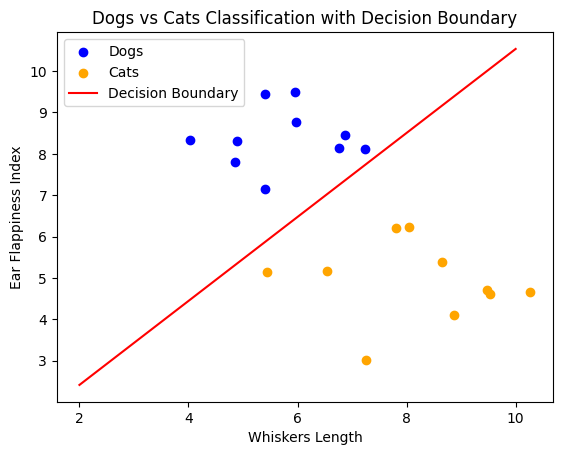

In [17]:
plt.scatter(dogs_whiskers_lengths, dogs_ear_flappiness_index, color='blue', label='Dogs')
plt.scatter(cats_whiskers_lengths, cats_ear_flappiness_index, color='orange', label='Cats')
plt.plot(x_values, y_values, color='red', label='Decision Boundary')
plt.xlabel('Whiskers Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification with Decision Boundary')
plt.legend()
plt.show()